In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv


Let's start with some EDA to learn more about our dataset.

# **SIMPLE EDA**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import datetime

2024-05-29 04:01:26.804203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 04:01:26.804343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 04:01:26.976348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8.036000e+03
mean,30.054280,30.351487,29.751322,30.058857,26.674025,1.470459e+07
std,33.615577,33.906613,33.314569,33.615911,31.728090,1.340021e+07
min,0.328125,0.347656,0.320313,0.335938,0.260703,1.504000e+06
25%,4.392031,4.531250,4.304922,4.399610,3.414300,7.817750e+06
50%,13.325000,13.493750,13.150000,13.330000,10.352452,1.169815e+07
75%,55.250000,55.722501,54.852499,55.267499,47.464829,1.778795e+07
max,126.080002,126.320000,124.809998,126.059998,118.010414,5.855088e+08


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
date = df['Date']

In [9]:
adj_close = df['Adj Close']

In [10]:
low = df['Low']
high = df['High']
stock_open = df['Open']
stock_close = df['Close']
volume = df['Volume']

In [11]:
mean_price = adj_close.mean()
print(mean_price)

26.67402475348432


In [12]:
from sklearn.linear_model import LinearRegression

date_numeric = np.array([(d - min(date)).days for d in date]).reshape(-1, 1)

lr = LinearRegression(fit_intercept=False)

lr.fit(date_numeric, adj_close)

LinearRegression(fit_intercept=False)

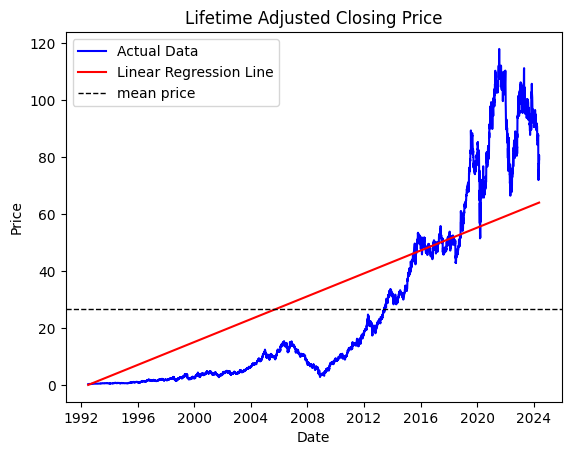

In [13]:
adj_close_pred = lr.predict(date_numeric)



plt.plot(date, adj_close, color='blue', label="Actual Data")
plt.plot(date, adj_close_pred, color='red', label='Linear Regression Line')
plt.ylabel("Price")
plt.xlabel("Date")
plt.axhline(mean_price, color='black', linestyle='--', linewidth=1, label='mean price')
plt.legend()
plt.title("Lifetime Adjusted Closing Price")
plt.show()

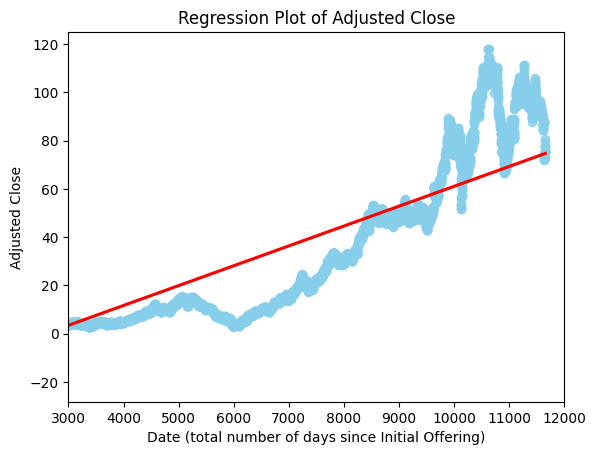

In [14]:
sns.regplot(x=date_numeric, y=adj_close, ci=None, color="skyblue", line_kws=dict(color="r"))
plt.title("Regression Plot of Adjusted Close")
plt.ylabel("Adjusted Close")
plt.xlabel("Date (total number of days since Initial Offering)")
plt.xlim(3000, 12000)
plt.show()

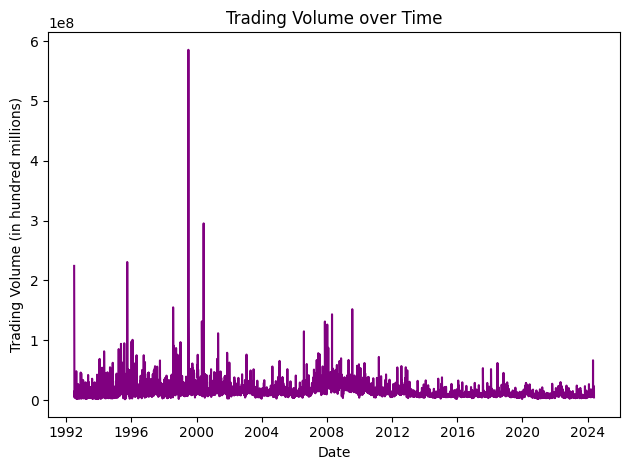

In [15]:
plt.plot(date, volume, color='purple')
plt.title("Trading Volume over Time")
plt.xlabel("Date")
plt.ylabel("Trading Volume (in hundred millions)")
plt.tight_layout()
plt.show()

In [16]:
df['Volume'].max()

585508800

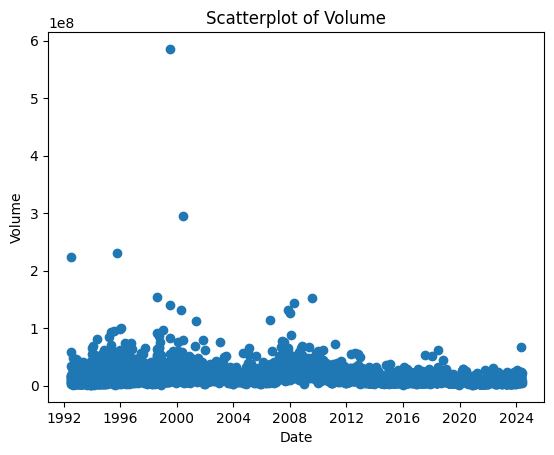

In [17]:
plt.scatter(date, volume, marker='o')
plt.title("Scatterplot of Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

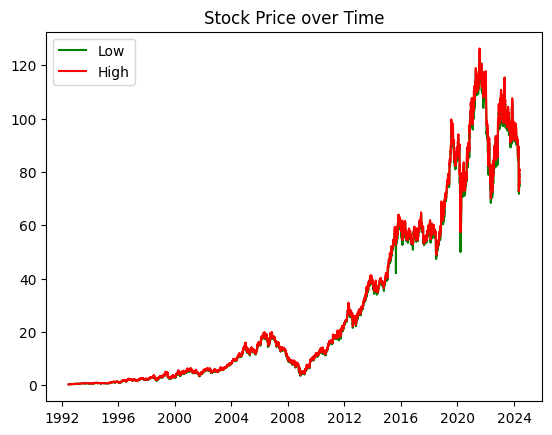

In [18]:
plt.plot(date, low, color='green', label="Low")
plt.plot(date, high, color='red', label="High")
plt.title("Stock Price over Time")
plt.legend()
plt.show()

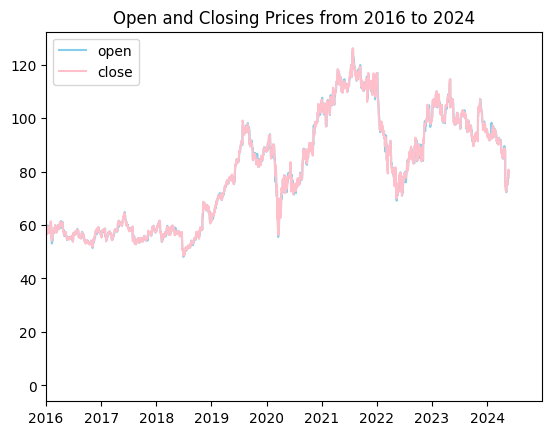

In [19]:
import datetime

plt.plot(date, stock_open, color='skyblue', label='open')
plt.plot(date, stock_close, color='pink', label='close')
plt.title("Open and Closing Prices from 2016 to 2024")
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2024, 12, 31)
plt.xlim(start_date, end_date)
plt.legend()
plt.show()

<Figure size 3000x2000 with 0 Axes>

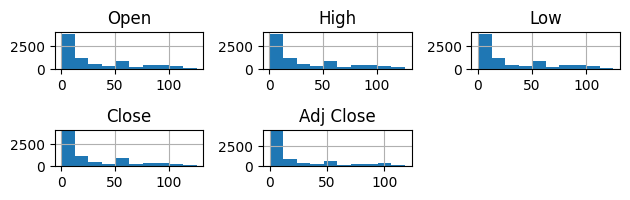

In [20]:
plt.figure(figsize=(30, 20))
df_prices = df.drop(columns=['Date', 'Volume'])

df_prices.hist(layout=(5, 3))
plt.tight_layout()
plt.show()

All of our histograms are very similar so we want to see if there is a linear relationship between our variables so lets do some scatterplots for our price variables.

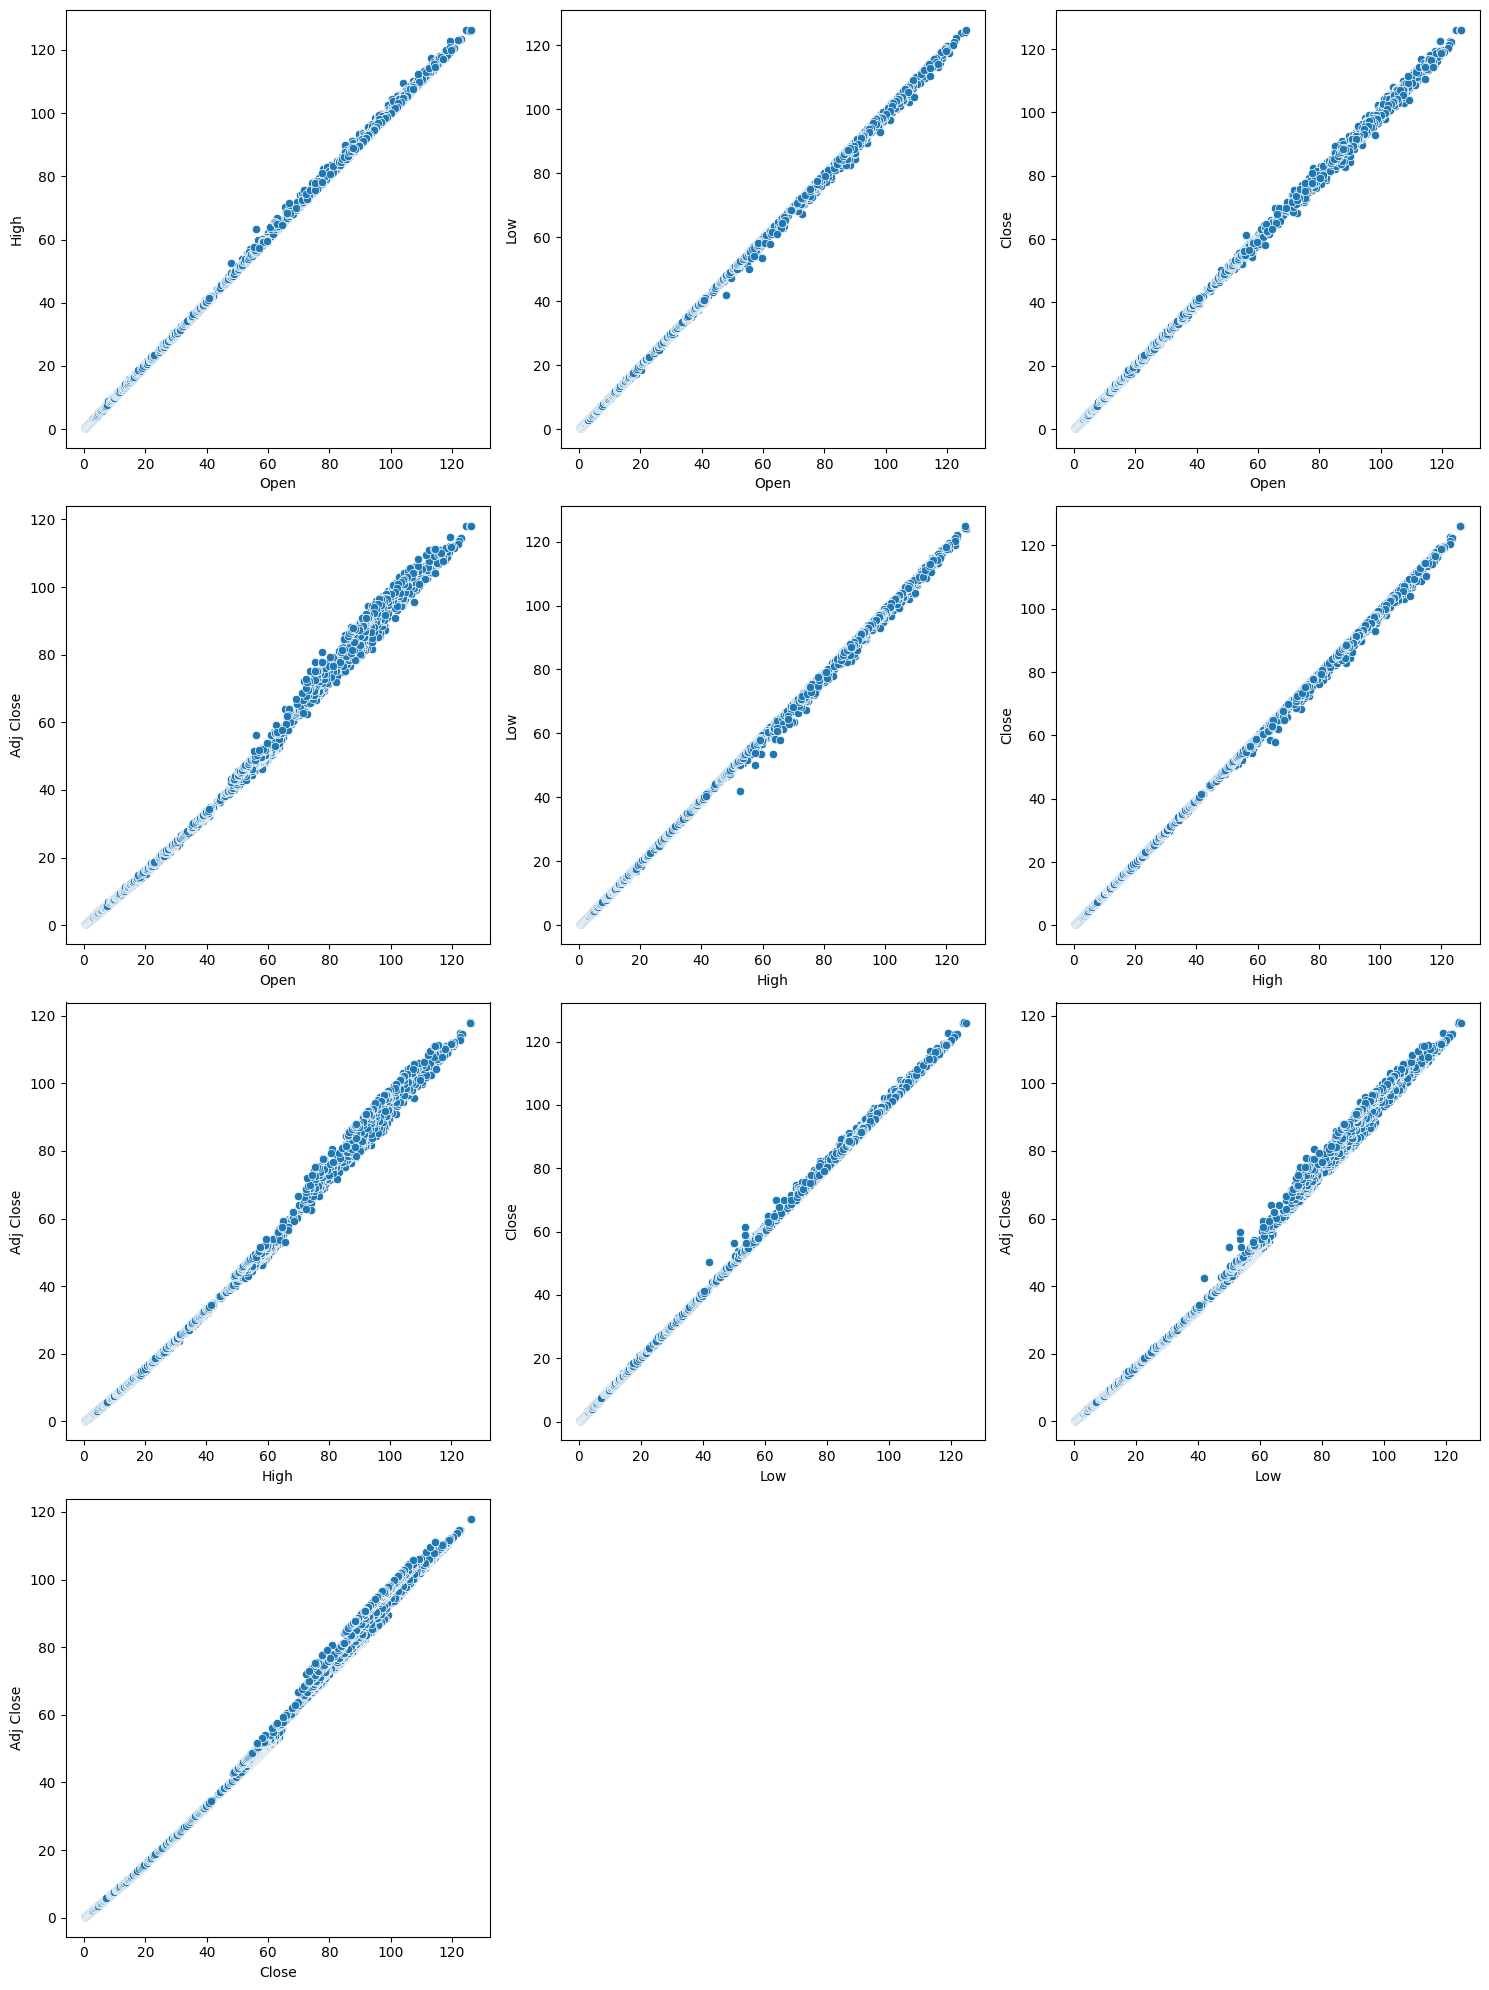

In [21]:
def scatter_plots(df):
    columns = df.columns
    num_plots = len(columns) * (len(columns) - 1) // 2
    fig, axes = plt.subplots(nrows=num_plots // 3 + 1, ncols=3, figsize=(15, 5 * (num_plots // 3 + 1)))
    axes = axes.flatten()
    current_plot = 0
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            sns.scatterplot(data=df, x=columns[i], y=columns[j], ax=axes[current_plot])
            axes[current_plot].set_xlabel(columns[i])
            axes[current_plot].set_ylabel(columns[j])
            current_plot += 1

    for ax in axes[current_plot:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    
scatter_plots(df_prices)

All of our price variables seem to have strong linear relationships with one another. 

               Open      High       Low     Close  Adj Close
Open       1.000000  0.999935  0.999924  0.999858   0.997838
High       0.999935  1.000000  0.999898  0.999931   0.997945
Low        0.999924  0.999898  1.000000  0.999930   0.997872
Close      0.999858  0.999931  0.999930  1.000000   0.997965
Adj Close  0.997838  0.997945  0.997872  0.997965   1.000000


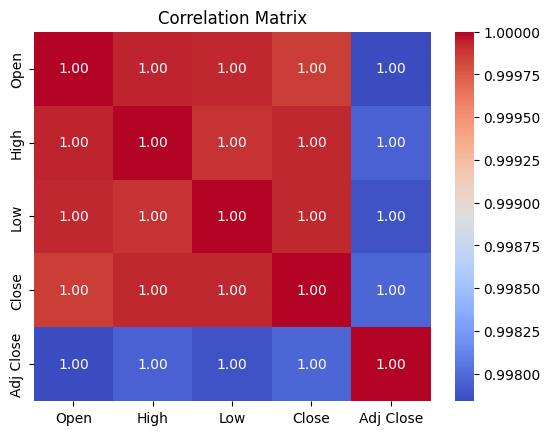

In [22]:
correlation_matrix = df_prices.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This linear relationship is clearly shown in our correlation matrix! This should be great for our model's predictability but we need to careful of similar/duplicated data causing overfitting.

Let's do a correlation matrix for our full dataset as well to see if there is anything that sticks out.

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.889643  0.889886  0.889451  0.889680   0.873682   
Open       0.889643  1.000000  0.999935  0.999924  0.999858   0.997838   
High       0.889886  0.999935  1.000000  0.999898  0.999931   0.997945   
Low        0.889451  0.999924  0.999898  1.000000  0.999930   0.997872   
Close      0.889680  0.999858  0.999931  0.999930  1.000000   0.997965   
Adj Close  0.873682  0.997838  0.997945  0.997872  0.997965   1.000000   
Volume    -0.251053 -0.319598 -0.318317 -0.320951 -0.319534  -0.314163   

             Volume  
Date      -0.251053  
Open      -0.319598  
High      -0.318317  
Low       -0.320951  
Close     -0.319534  
Adj Close -0.314163  
Volume     1.000000  


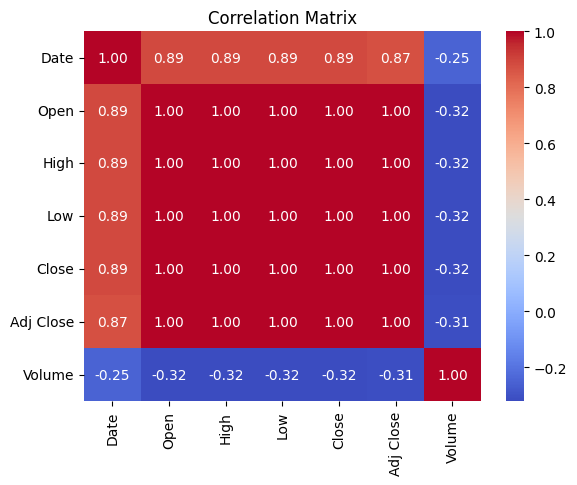

In [23]:
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Date seems to have a very strong positive correlation to our price variables, and Volume has a weak negative correlation to our price variables. 

# **FEATURE ENGINEERING**

We have some feature engineering we can do such as the difference between open and close, as well as the difference between high and low.

In [24]:
df['EOD Change'] = df['Close'] - df['Open']
df['Peak Change'] = df['High'] - df['Low']

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EOD Change,Peak Change
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400,0.007813,0.027343
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800,0.019531,0.035157
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600,-0.019532,0.027344
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800,0.003906,0.019531
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800,-0.003906,0.011719


                 Date      Open      High       Low     Close  Adj Close  \
Date         1.000000  0.889643  0.889886  0.889451  0.889680   0.873682   
Open         0.889643  1.000000  0.999935  0.999924  0.999858   0.997838   
High         0.889886  0.999935  1.000000  0.999898  0.999931   0.997945   
Low          0.889451  0.999924  0.999898  1.000000  0.999930   0.997872   
Close        0.889680  0.999858  0.999931  0.999930  1.000000   0.997965   
Adj Close    0.873682  0.997838  0.997945  0.997872  0.997965   1.000000   
Volume      -0.251053 -0.319598 -0.318317 -0.320951 -0.319534  -0.314163   
EOD Change   0.002725 -0.007827  0.000338  0.000914  0.009009   0.008131   
Peak Change  0.710332  0.777274  0.781313  0.772322  0.776846   0.778432   

               Volume  EOD Change  Peak Change  
Date        -0.251053    0.002725     0.710332  
Open        -0.319598   -0.007827     0.777274  
High        -0.318317    0.000338     0.781313  
Low         -0.320951    0.000914     0.772

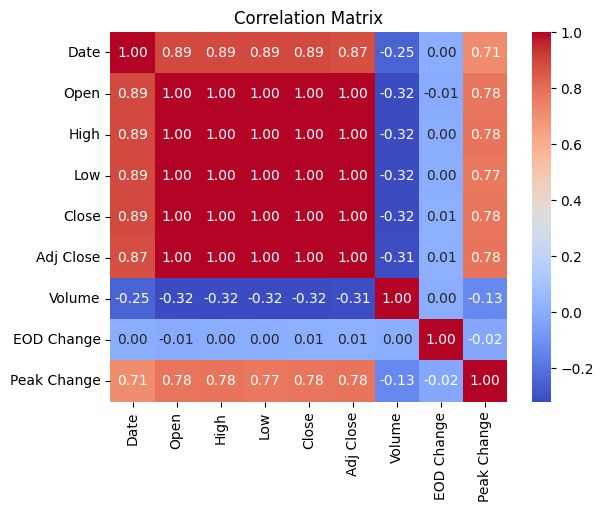

In [26]:
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

EOD change has very little effect on any of our variables, but Peak Change has a much more regular correlation - we can drop EOD change and keep peak change when crafting our model. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Peak Change', ylabel='Count'>

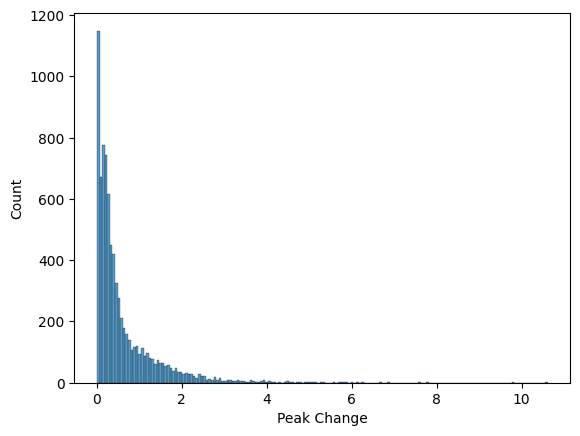

In [27]:
sns.histplot(df['Peak Change'])

In [28]:
adj_peak_change = np.log1p(df['Peak Change'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Peak Change', ylabel='Count'>

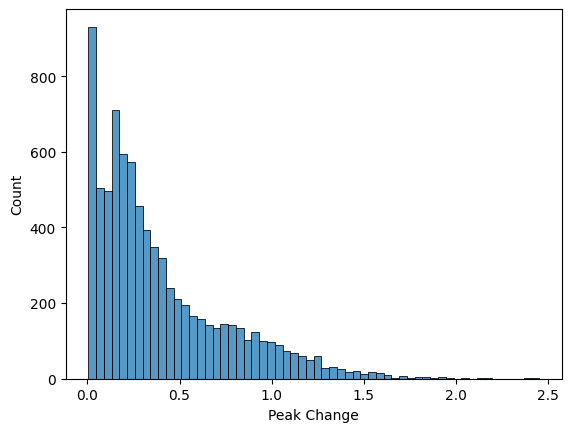

In [29]:
sns.histplot(adj_peak_change)

No clear difference between our peak change and adjusted peak change variables, can keep peak change

In [30]:
scaled_peak_change = df['Peak Change']

mean = scaled_peak_change.mean()
std = scaled_peak_change.std()

scaled_peak_change -= mean
scaled_peak_change /= std

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Peak Change', ylabel='Count'>

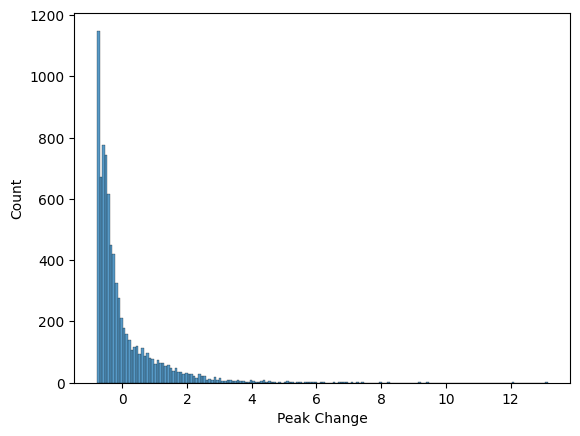

In [31]:
sns.histplot(scaled_peak_change)

In [32]:
df = df.sort_values('Date')

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EOD Change,Peak Change
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400,0.007813,-0.751634
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800,0.019531,-0.741381
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600,-0.019532,-0.751633
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800,0.003906,-0.761885
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800,-0.003906,-0.772135


In [34]:
df['Close Change'] = df['Close'].diff()

In [35]:
print(df['Close Change'].head())

0         NaN
1    0.023437
2   -0.011719
3    0.007813
4    0.000000
Name: Close Change, dtype: float64


In [36]:
df['Close Change'] = df['Close Change'].fillna(0)

In [37]:
print(df['Close Change'].head())

0    0.000000
1    0.023437
2   -0.011719
3    0.007813
4    0.000000
Name: Close Change, dtype: float64


In [38]:
df['Open Change'] = df['Open'].diff()
df['Open Change'] = df['Open Change'].fillna(0)
print(df['Open Change'].head())

0    0.000000
1    0.011719
2    0.027344
3   -0.015625
4    0.007812
Name: Open Change, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Open Change', ylabel='Count'>

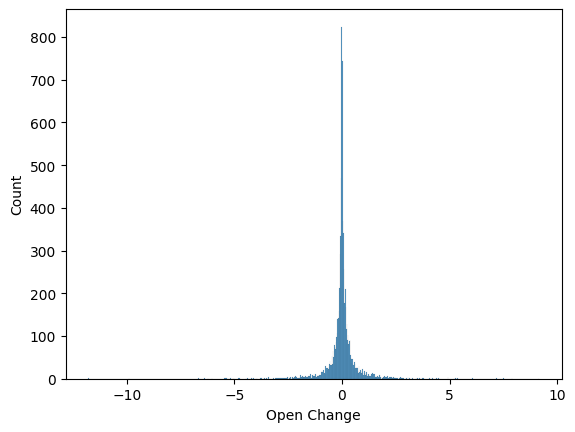

In [39]:
sns.histplot(df, x=df['Open Change'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close Change', ylabel='Count'>

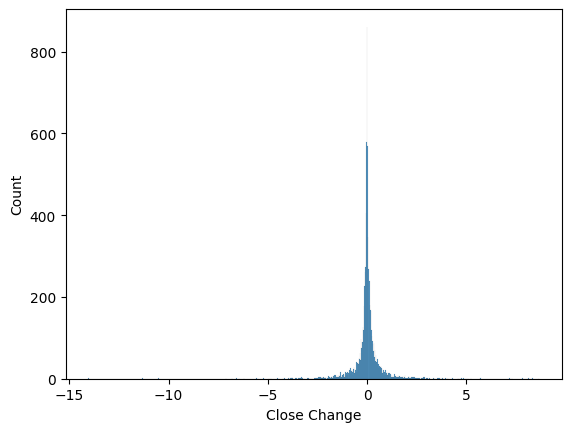

In [40]:
sns.histplot(df, x=df['Close Change'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Volume', ylabel='Count'>

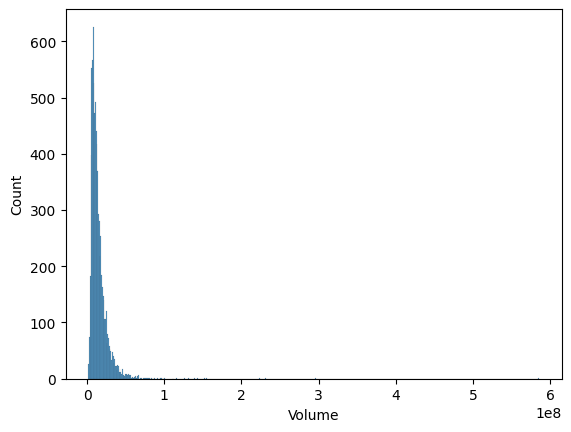

In [41]:
sns.histplot(df, x=df['Volume'])

In [42]:
volume = np.log1p(volume)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Volume', ylabel='Count'>

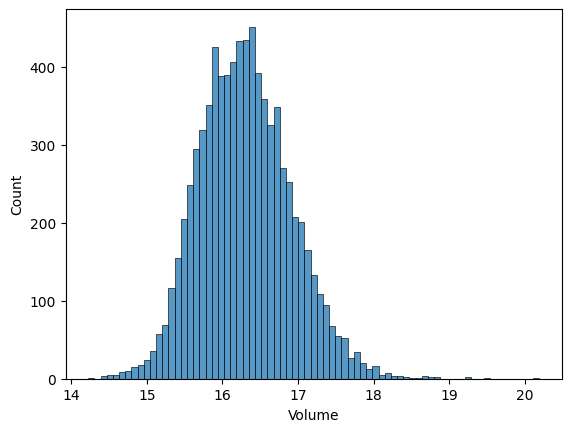

In [43]:
sns.histplot(volume)

In [44]:
df['adjusted_volume'] = volume

                     Date      Open      High       Low     Close  Adj Close  \
Date             1.000000  0.889643  0.889886  0.889451  0.889680   0.873682   
Open             0.889643  1.000000  0.999935  0.999924  0.999858   0.997838   
High             0.889886  0.999935  1.000000  0.999898  0.999931   0.997945   
Low              0.889451  0.999924  0.999898  1.000000  0.999930   0.997872   
Close            0.889680  0.999858  0.999931  0.999930  1.000000   0.997965   
Adj Close        0.873682  0.997838  0.997945  0.997872  0.997965   1.000000   
Volume          -0.251053 -0.319598 -0.318317 -0.320951 -0.319534  -0.314163   
EOD Change       0.002725 -0.007827  0.000338  0.000914  0.009009   0.008131   
Peak Change      0.710332  0.777274  0.781313  0.772322  0.776846   0.778432   
Close Change     0.005555  0.002015  0.007937  0.009074  0.015005   0.013373   
Open Change      0.006005  0.014964  0.014639  0.015606  0.014848   0.013216   
adjusted_volume -0.356561 -0.497585 -0.4

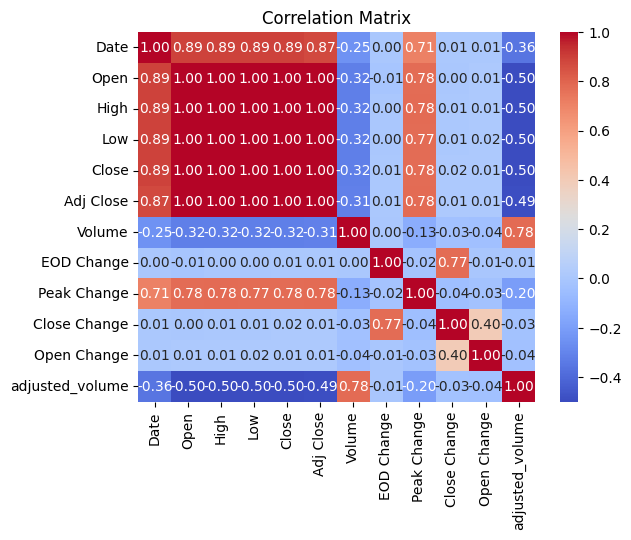

In [45]:
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Adjusted volume has a much better correlation than volume, as well as a much more regular distribution, so we may want to keep Adjusted Volume over volume as well

In [46]:
df['closing_difference_high'] = df['Close'] - df['High']
df['closing_difference_low'] = df['Close'] - df['Low']
print(df['closing_difference_high'].head())
print(df['closing_difference_low'].head())

0   -0.011718
1   -0.007813
2   -0.023438
3   -0.003906
4   -0.003906
Name: closing_difference_high, dtype: float64
0    0.015625
1    0.027344
2    0.003906
3    0.015625
4    0.007813
Name: closing_difference_low, dtype: float64


In [47]:
df = df.drop(columns=['Volume', 'EOD Change'])

                             Date      Open      High       Low     Close  \
Date                     1.000000  0.889643  0.889886  0.889451  0.889680   
Open                     0.889643  1.000000  0.999935  0.999924  0.999858   
High                     0.889886  0.999935  1.000000  0.999898  0.999931   
Low                      0.889451  0.999924  0.999898  1.000000  0.999930   
Close                    0.889680  0.999858  0.999931  0.999930  1.000000   
Adj Close                0.873682  0.997838  0.997945  0.997872  0.997965   
Peak Change              0.710332  0.777274  0.781313  0.772322  0.776846   
Close Change             0.005555  0.002015  0.007937  0.009074  0.015005   
Open Change              0.006005  0.014964  0.014639  0.015606  0.014848   
adjusted_volume         -0.356561 -0.497585 -0.495658 -0.499788 -0.497677   
closing_difference_high -0.538913 -0.594999 -0.594560 -0.587614 -0.585040   
closing_difference_low   0.552957  0.599831  0.606438  0.599561  0.609021   

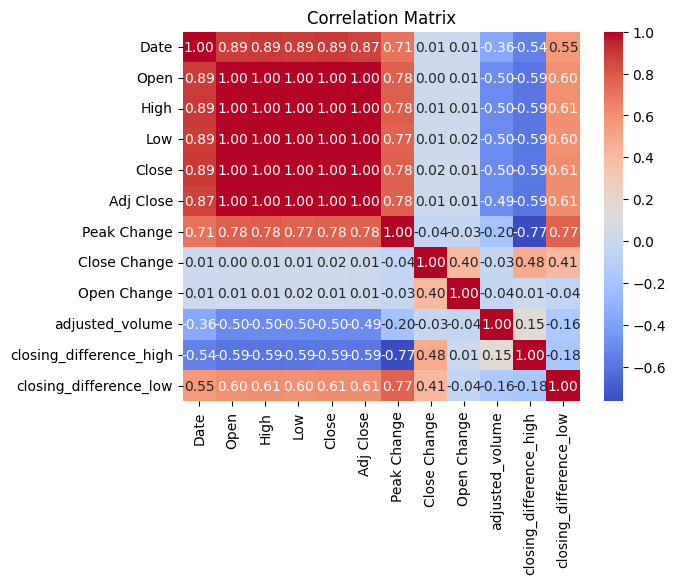

In [48]:
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

closing difference high and low are pretty similar correlations, the opposite in +/- is simply due to them being opposite variables.

In [49]:
df['opening_difference_high'] = df['Open'] - df['High']
df['opening_difference_low'] = df['Open'] - df['Low']

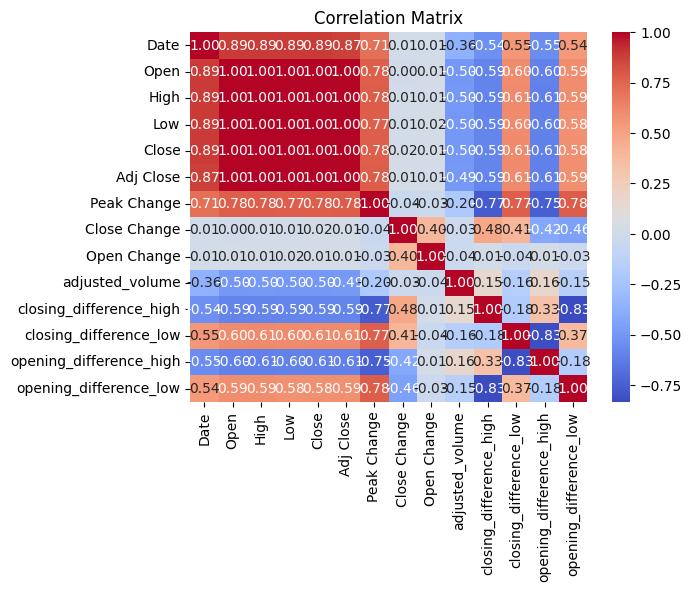

In [50]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

Same for opening difference high and low, all 3 are very similar so we would be best off keeping one of each at most. Currently I'm thinking we keep closing_difference_low and opening_difference_high

In [51]:
df = df.drop(columns=['closing_difference_high', 'opening_difference_low'])

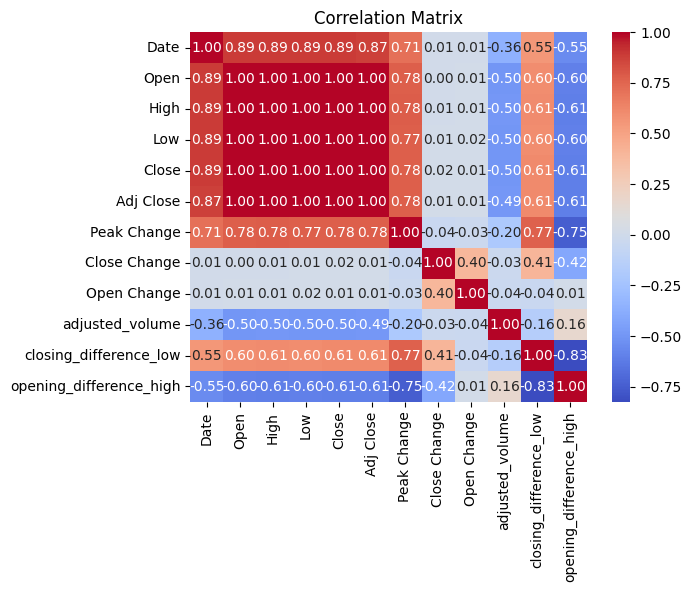

In [52]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

Likely, we need to normalize our price variables so that they can have a better interpretation in our model. This will prevent overfitting and thus make our model have a much better prediction accuracy on future dates. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


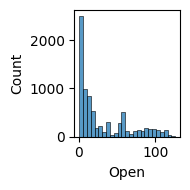

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


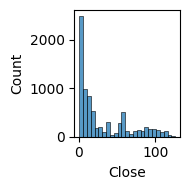

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


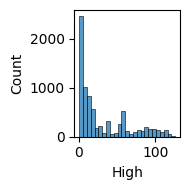

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


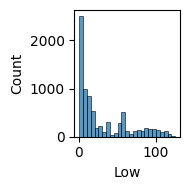

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


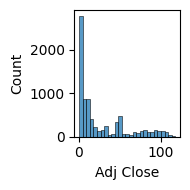

In [53]:
def plot_histograms(*args):
    for data in args:
        plt.figure(figsize=(2,2))
        sns.histplot(data)
        plt.tight_layout()
        plt.show()
        
        
plot_histograms(stock_open, stock_close, high, low, adj_close)

All of our price variables data are skewed right, so we need to try some adjustments via data transformations specifically for this to try to normalize our variables.

# **NORMALIZING OUR PRICE VARIABLES**

In [54]:
price_variables = ['Open', 'Close', 'High', 'Low', 'Adj Close']

In [55]:
print(df[price_variables].head())

       Open     Close      High       Low  Adj Close
0  0.328125  0.335938  0.347656  0.320313   0.260703
1  0.339844  0.359375  0.367188  0.332031   0.278891
2  0.367188  0.347656  0.371094  0.343750   0.269797
3  0.351563  0.355469  0.359375  0.339844   0.275860
4  0.359375  0.355469  0.359375  0.347656   0.275860


In [56]:
from scipy import stats
from scipy.stats import boxcox, yeojohnson
from scipy.stats import shapiro, kstest, anderson

In [57]:
log_close = np.log1p(df['Adj Close'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Adj Close', ylabel='Count'>

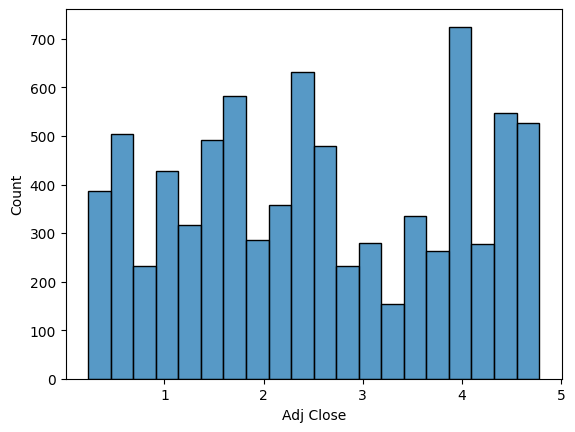

In [58]:
sns.histplot(log_close)

In [59]:
#Log

shapiro_stat, shapiro_p_value = shapiro(log_close)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(log_close, 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(log_close)
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 0.0
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 124.08216396707394
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [60]:
transformed_data = df[price_variables].apply(np.sqrt)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: ylabel='Count'>

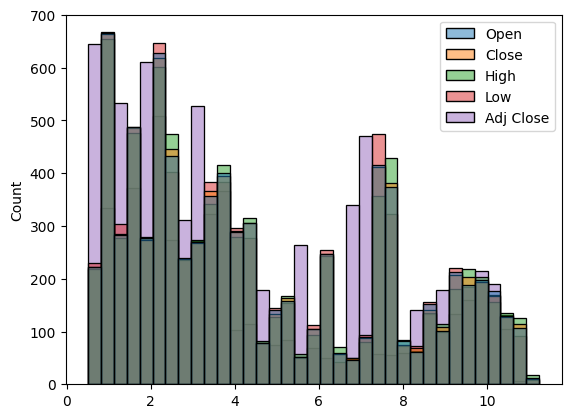

In [61]:
sns.histplot(transformed_data)

In [62]:
box_cox_data, lambda_boxcox = boxcox(df['Adj Close'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

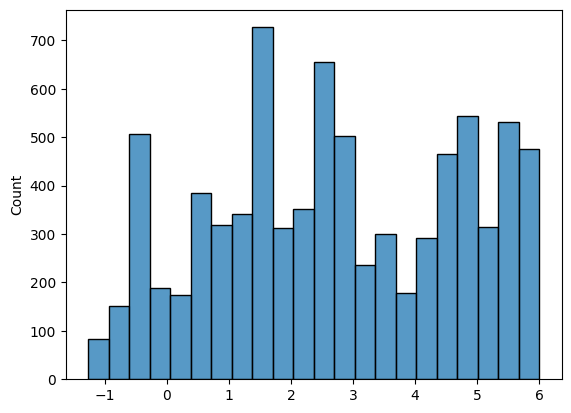

In [63]:
sns.histplot(box_cox_data)

In [64]:
transformed_data_yeojohnson, lambda_yeojohnson = yeojohnson(df['Adj Close'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

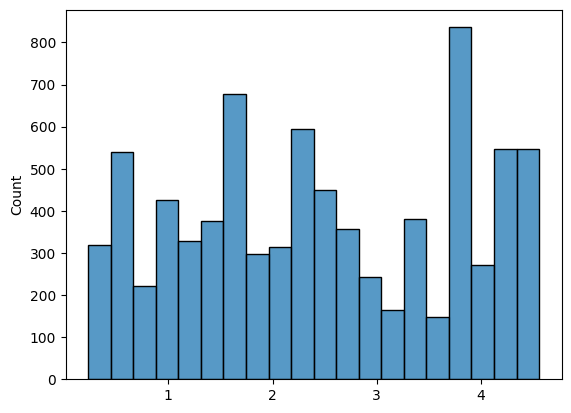

In [65]:
sns.histplot(transformed_data_yeojohnson)

Now let's test these distributions to see if they are indeed regular. 

In [66]:
from scipy.stats import shapiro, kstest, anderson

# Box-Cox

# Example usage assuming transformed_data_boxcox is the transformed data
# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(box_cox_data)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(box_cox_data, 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(box_cox_data)
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 6.165713243029195e-44
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 89.89905263801302
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Box-Cox** ^^^ is by far the closest we got to a normalized dataset for our adjusted close variable. 

In [67]:
#Sqrt

shapiro_stat, shapiro_p_value = shapiro(transformed_data['Adj Close'])
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(transformed_data['Adj Close'], 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(transformed_data['Adj Close'])
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 0.0
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 295.1813071976867
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


In [68]:
#Yeo-Johnson

shapiro_stat, shapiro_p_value = shapiro(transformed_data_yeojohnson)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(transformed_data_yeojohnson, 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(transformed_data_yeojohnson)
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 0.0
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 121.7318466629713
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


Neither have a regular distribution, are null hypotheses are rejected by both the Shapiro and ktest, and our anderson-darling tests all have statistics over 100 indicating they are far from a "regular" normal distribution. However, so far the Box-Cox distribution is the most normalized with a test statistic of 107.2

In [69]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Peak Change,Close Change,Open Change,adjusted_volume,closing_difference_low,opening_difference_high
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,-0.751634,0.000000,0.000000,19.228755,0.015625,-0.019531
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,-0.741381,0.023437,0.011719,17.888509,0.027344,-0.027344
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,-0.751633,-0.011719,0.027344,17.364484,0.003906,-0.003906
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,-0.761885,0.007813,-0.015625,16.723329,0.015625,-0.007812
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,-0.772135,0.000000,0.007812,16.454339,0.007813,0.000000


In [70]:
import numpy as np
from scipy.stats.mstats import winsorize

# Assuming 'data' is your original data array or pandas Series
# Set the percentage of data to Winsorize (e.g., 5% from each tail)
percent_to_trim = 0.05

# Apply Winsorization
winsorized_data = winsorize(df['Adj Close'], limits=[percent_to_trim, percent_to_trim])

# Now 'winsorized_data' contains the Winsorized values


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

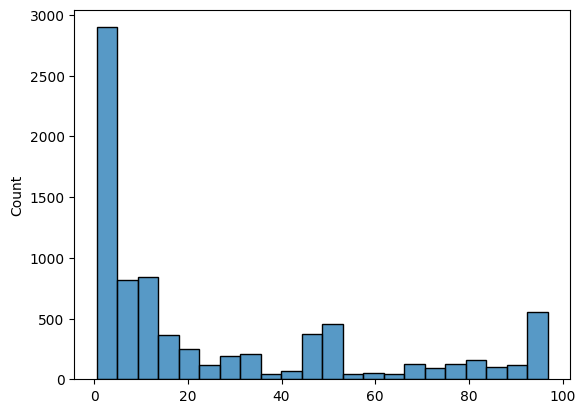

In [71]:
sns.histplot(winsorized_data)

In [72]:
shapiro_stat, shapiro_p_value = shapiro(winsorized_data)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(winsorized_data, 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(winsorized_data)
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 0.0
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 697.209568877699
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Let's be sure to check the distribution of our original dataset as a baseline as well to ensure we pick a distribution that is the most normalized for our data.

In [73]:
shapiro_stat, shapiro_p_value = shapiro(df['Adj Close'])
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

# Kolmogorov-Smirnov Test
kstest_stat, kstest_p_value = kstest(df['Adj Close'], 'norm')
print("Kolmogorov-Smirnov Test - p-value:", kstest_p_value)

# Anderson-Darling Test
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(df['Adj Close'])
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Shapiro-Wilk Test - p-value: 0.0
Kolmogorov-Smirnov Test - p-value: 0.0
Anderson-Darling Test - statistic: 690.0493950285854
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


Our most normalized distribution would still be the Box-Cox Transformation.

**Let's try scaling our data to normalize it**

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()

In [76]:
scaled_data = sc.fit_transform(df[price_variables])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


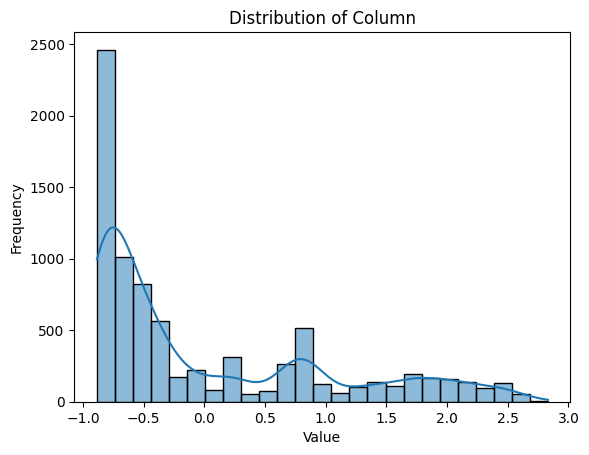

In [77]:
sns.histplot(scaled_data[:, 2], kde=True)
plt.title('Distribution of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [78]:
stat, p = shapiro(scaled_data[:, 2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.807, p=0.000
Sample does not look Gaussian (reject H0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [79]:
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(scaled_data[:, 2])
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Anderson-Darling Test - statistic: 606.2498900752053
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


Our data still does not have a normal distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Adj Close', ylabel='Count'>

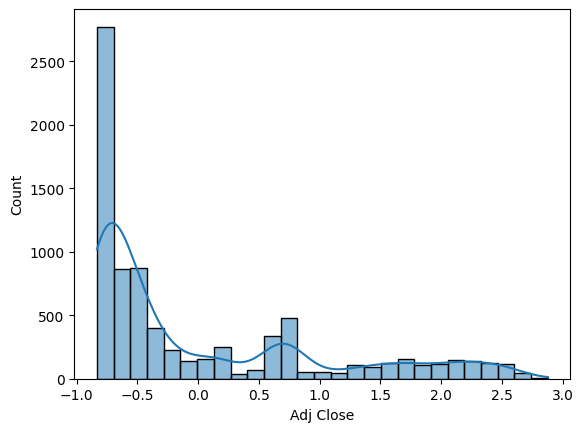

In [80]:
scaling_test = df[price_variables]

mean = scaling_test.mean()
std = scaling_test.std()

scaling_test -= mean
scaling_test /= std

sns.histplot(scaling_test['Adj Close'], kde=True)

In [81]:
anderson_stat, anderson_critical_values, anderson_significance_levels = anderson(scaling_test['Adj Close'])
print("Anderson-Darling Test - statistic:", anderson_stat)
print("Anderson-Darling Test - critical values:", anderson_critical_values)

Anderson-Darling Test - statistic: 690.0493950285854
Anderson-Darling Test - critical values: [0.576 0.656 0.787 0.918 1.091]


Still not a normal distribution in fact its seemingly getting more skewed - We will use **kernel-clustering, likely in the form of Kmeans,** to get the correct input we'd like for an optimal output. 

# **CONCLUSION**

In conclusion, we were able to explore the data set to pick up some ideas of what to explore further and maybe even some conclusions we could make on the raw financial data if required. However since this project will focus on creating a predictive model, I won't go too far in depth on that at this time (maybe as a side project later). 

We were able to introduce new features with varying correlations that I believe will be insightful for our forecasting model, and used logarithms and/or scaling to normalize them when proved it would be fruitful. Our correlation matrix is still shows heavy correlations in our price data that will still need to be corrected to prevent overfitting of our data to our model. 

Our main issue with our price data is that it is not normalized in almost all of our price variable columns which would become a hassle for our model to try to interpret. Some of it was easily normalized such as trade volume, however, most of it was not even close even with many methods attempted. The Box-Cox method provided the best method we could use to get to a normalized adjusted closing price variable, but this was not close enough to be taken seriously for our model. For this reason, we will need to use kernel clustering - most likely Kmeans - to be able to introduce normalized data to our model for each column. From there, we can begin to try to build a regression model that will predict our target variable: Adjusted Closing Price. 